## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## **Loading Data**

In [2]:
data = pd.read_csv("expenses.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Missing Values and Outliers**

In [6]:
data.isnull().sum().sum()


0

<ul><li><b> Here, we observe there is no missing values in our data and there are 7 columns and 1338 rows.</b></li>
    <li><b> There are 3 categorical varibles and 4 numerical variables.</b></li>
    <li><b> Here our target column is charges. we need to predict the charges based on other features.</b></li><ul>

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 640x480 with 0 Axes>

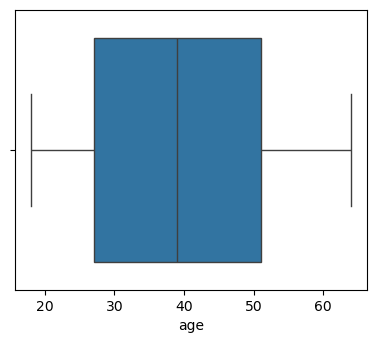

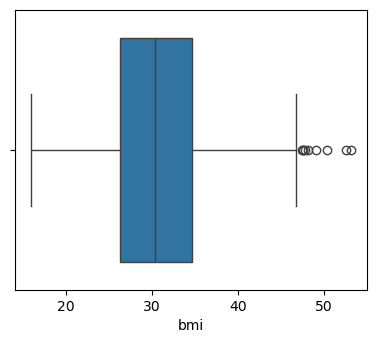

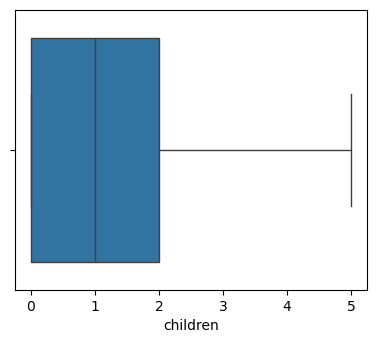

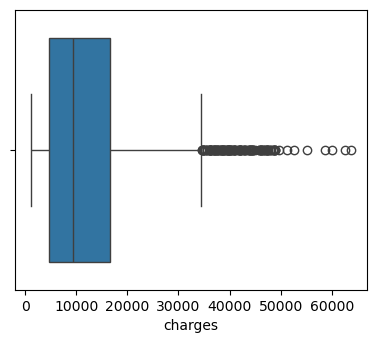

In [8]:
numeric = ['age','bmi','children','charges']
plt.suptitle("Outliers Detection")
for i,col in enumerate(numeric):
    plt.figure(figsize = (10,8))
    ax = plt.subplot(2,2,i+1)
    sns.boxplot(data= data, x =col,ax=ax)
    plt.show()

In [9]:
data[data['charges']>35000].count()

age         133
sex         133
bmi         133
children    133
smoker      133
region      133
charges     133
dtype: int64

## **Categorical Variable Analysis**

In [10]:
## value counts of each column
categorical = data.select_dtypes("object").columns
for i in categorical:
    print('\033[1m'+i+'\033[0m')
    print(data[i].value_counts())
    print("*"*20)

sex
male      676
female    662
Name: sex, dtype: int64
********************
smoker
no     1064
yes     274
Name: smoker, dtype: int64
********************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
********************


<Figure size 1000x800 with 0 Axes>

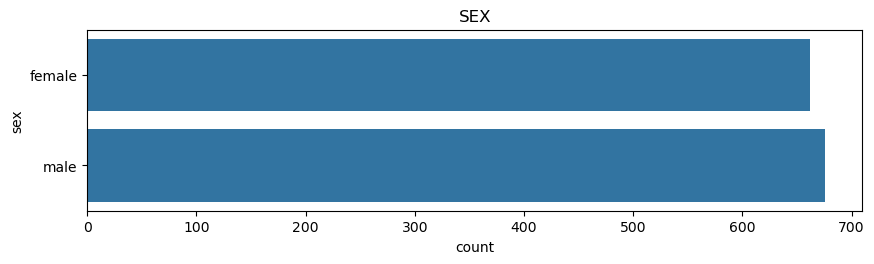

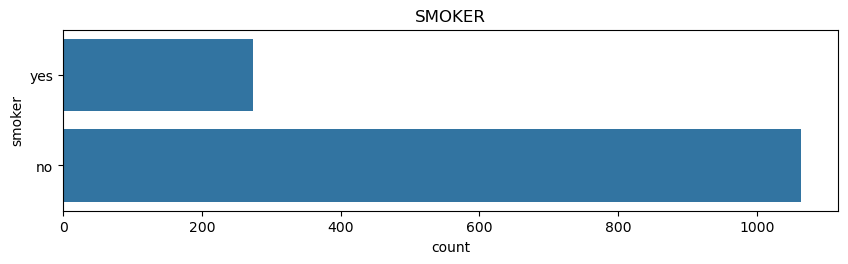

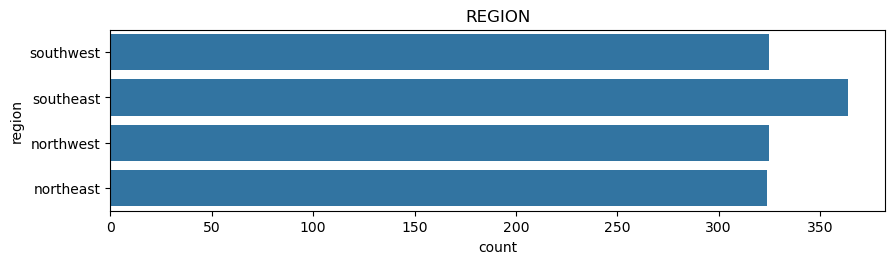

In [11]:
# visualizing the counts of categorical data
plt.figure(figsize = (10,8))
plt.suptitle("Visualizing the counts of categorical Data",fontsize=18)
for i,col in enumerate(categorical):
    plt.figure(figsize = (10,8))
    ax = plt.subplot(3,1,i+1)
    sns.countplot(data[col],ax = ax)
    ax.set_title(col.upper())
    plt.show()

        Not a Smoker  smoker
Female           547     115
Male             517     159


<Axes: >

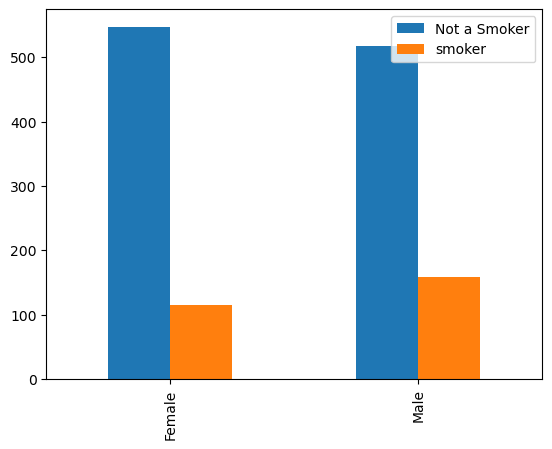

In [12]:
# how many male are smoking and how many female are smoking
smo_gender = pd.crosstab(index = data["sex"], columns = data["smoker"])
smo_gender.index = ['Female','Male']
smo_gender.columns = ['Not a Smoker','smoker']
print(smo_gender)
smo_gender.plot(kind = 'bar')

region northeast     northwest     southeast     southwest    
smoker        no yes        no yes        no yes        no yes
Female       132  29       135  29       139  36       141  21
Male         125  38       132  29       134  55       126  37


<Axes: >

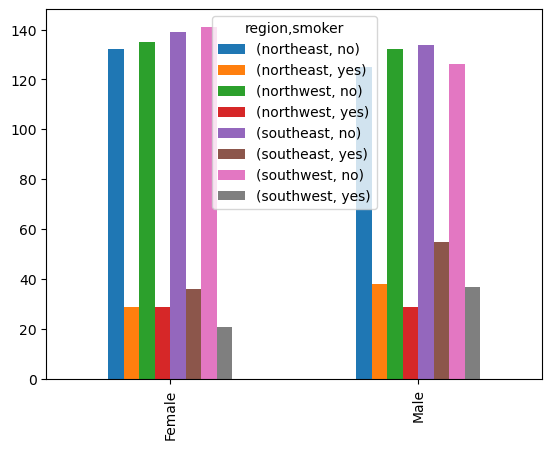

In [13]:
# how many male and female are smoking and not smoking according to region
smo_sex_region = pd.crosstab(index = data.sex, columns = [data.region,data.smoker])
smo_sex_region.index = ['Female','Male']
print(smo_sex_region)
smo_sex_region.plot(kind = 'bar')

<Figure size 1000x400 with 0 Axes>

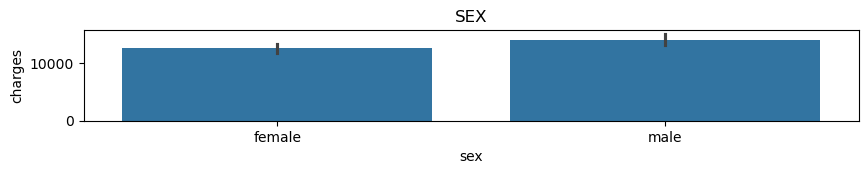

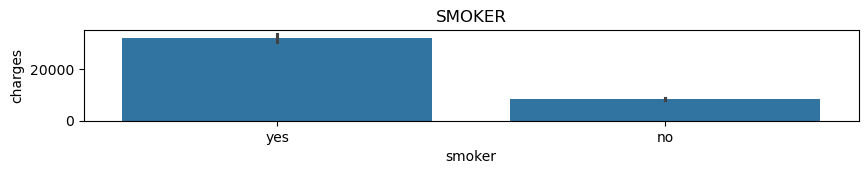

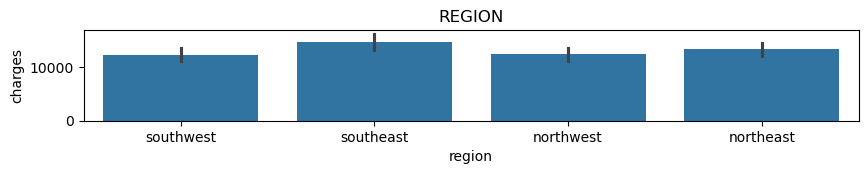

In [14]:
# analysing categorical data based on our target column
plt.figure(figsize = (10,4))
plt.suptitle("categorical data with charges")
for i,col in enumerate(categorical):
    plt.figure(figsize = (10,4))
    ax = plt.subplot(3,1,i+1)
    sns.barplot(x=data[col],y=data['charges'],ax =ax)
    ax.set_title(col.upper())
    plt.show()

## **Continuous Variable Analysis** 

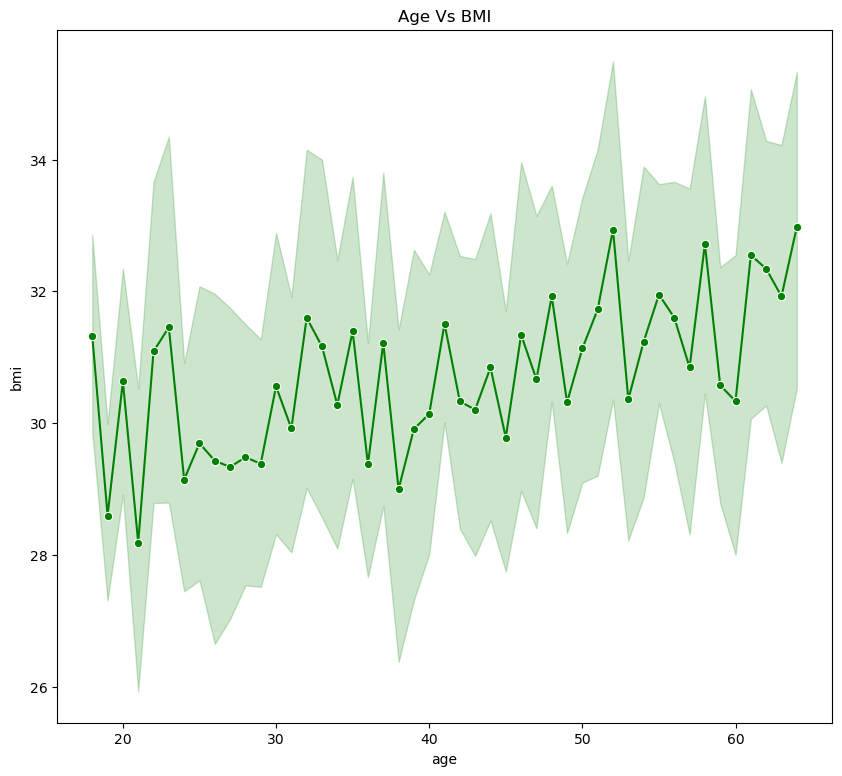

In [15]:
# what age of patients have how much bmi
plt.figure(figsize = (10,9))
sns.lineplot(x=data['age'],y=data['bmi'],marker = 'o', color = 'green')
plt.title('Age Vs BMI')
plt.show()

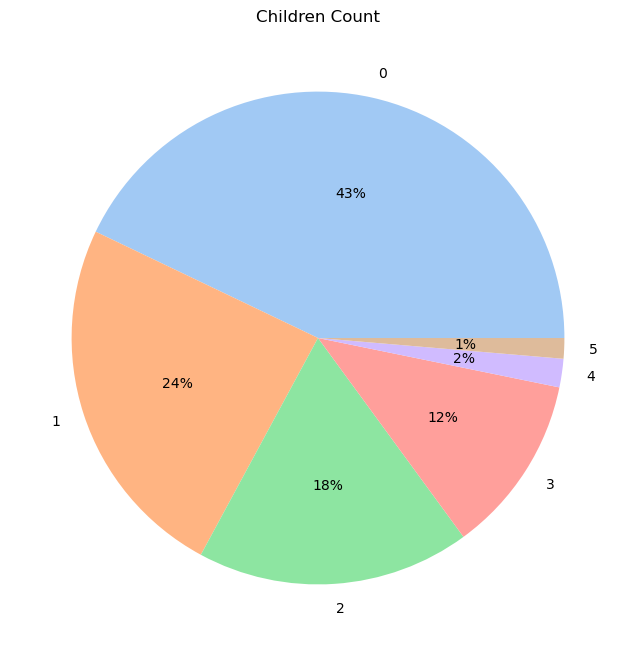

In [16]:
# seeing count of childrens
count = data["children"].value_counts()
labels = [0,1,2,3,4,5]
colors = sns.color_palette('pastel')[0:6]
plt.figure(figsize = (8,8))
plt.pie(count, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Children Count")
plt.show()


<Figure size 640x480 with 0 Axes>

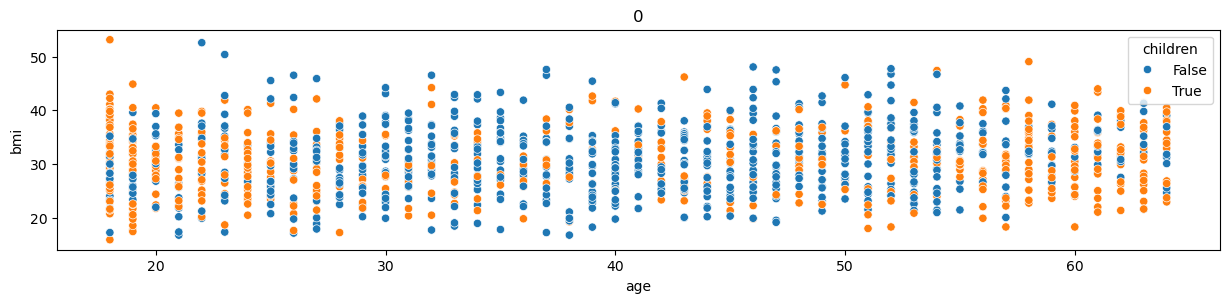

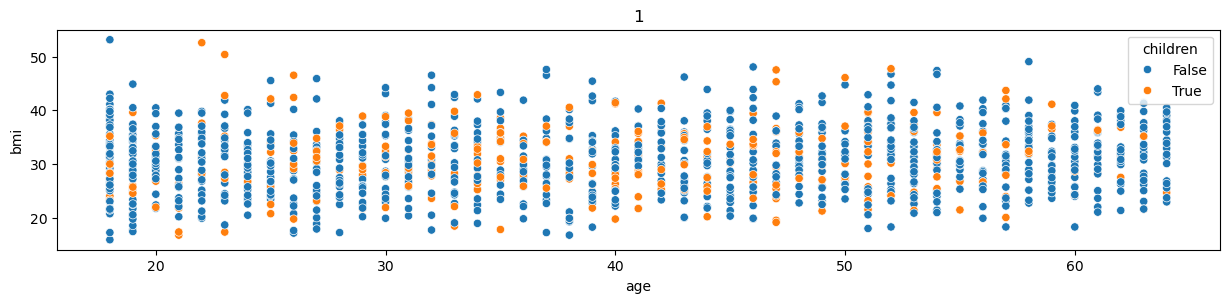

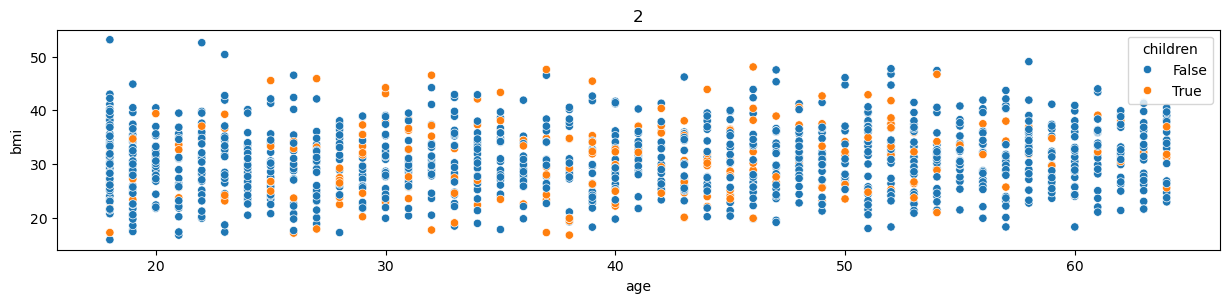

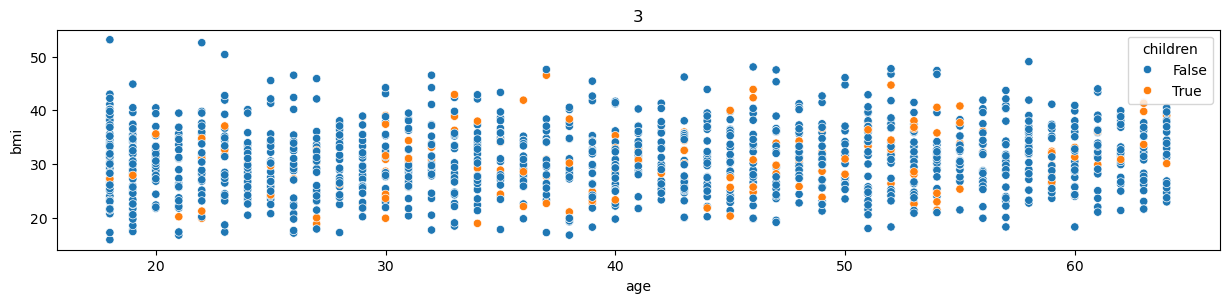

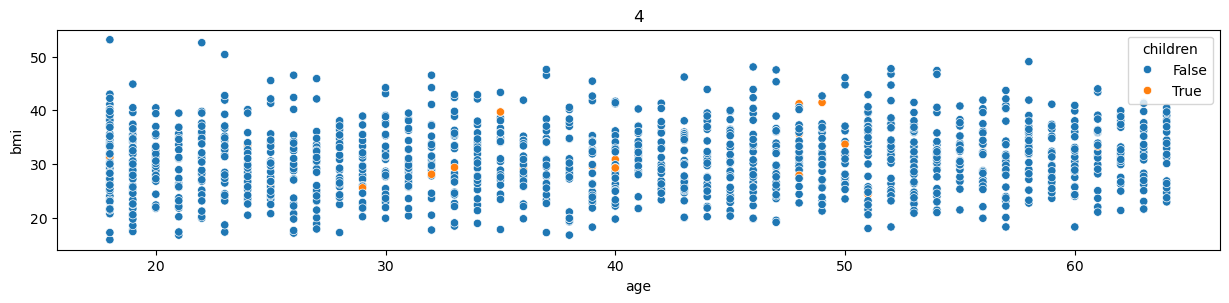

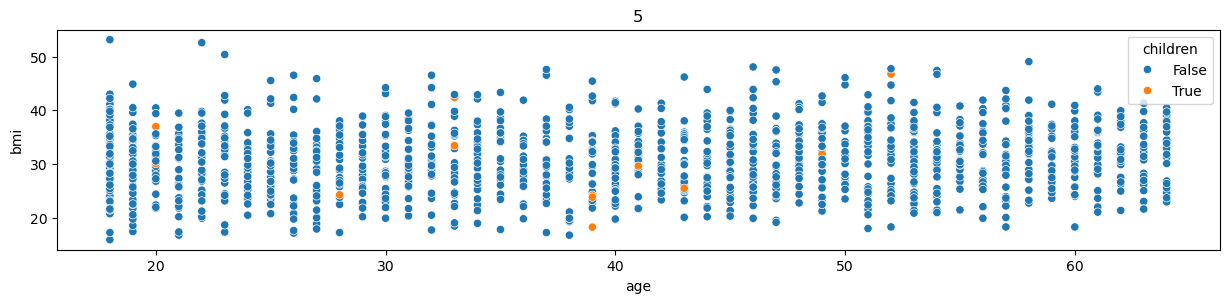

In [17]:
# how is bmi effecting number of children based on their age
child = [0,1,2,3,4,5]
plt.suptitle('BMI and Age based on number of children')
for i in child:
    plt.figure(figsize = (15,20))
    ax = plt.subplot(6,1,i+1)
    sns.scatterplot(x=data['age'],y=data['bmi'], hue = data['children'] == i,marker = 'o', ax = ax)
    ax.set_title(i)
    plt.show()


<Axes: xlabel='charges', ylabel='Density'>

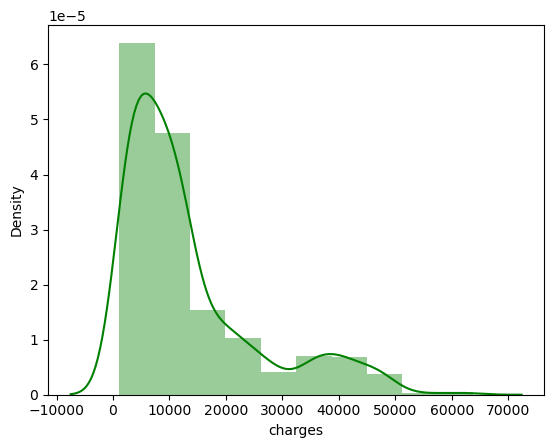

In [18]:
# seeing how is the distribution of the charges column
sns.distplot(data.charges,bins = 10, color = 'g')

In [19]:
# seeing the records with more than 55000 charges just to know how are the independent features
data[data['charges']>55000]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


<Axes: xlabel='bmi', ylabel='Density'>

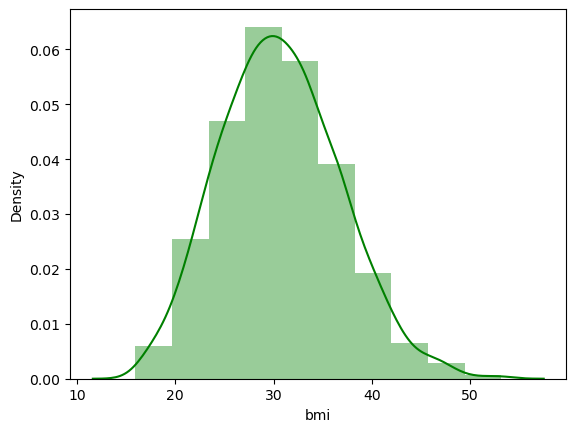

In [20]:
# seeing how is the distribution of the bmi column
sns.distplot(data['bmi'],bins = 10, color = 'g')

<ul><li>When bmi greater than 18.5 or less than 24 then the persons health is normal.</li>
    <li>When bmi less than 18.5 then the persons is underweight.</li>
    <li>When bmi greater than 24 then the persons is overweight.</li>   
    <li>When bmi greater than 30 then the persons is obese.</li></ul>   

## **Categorical and Continuous Variable Analysis**

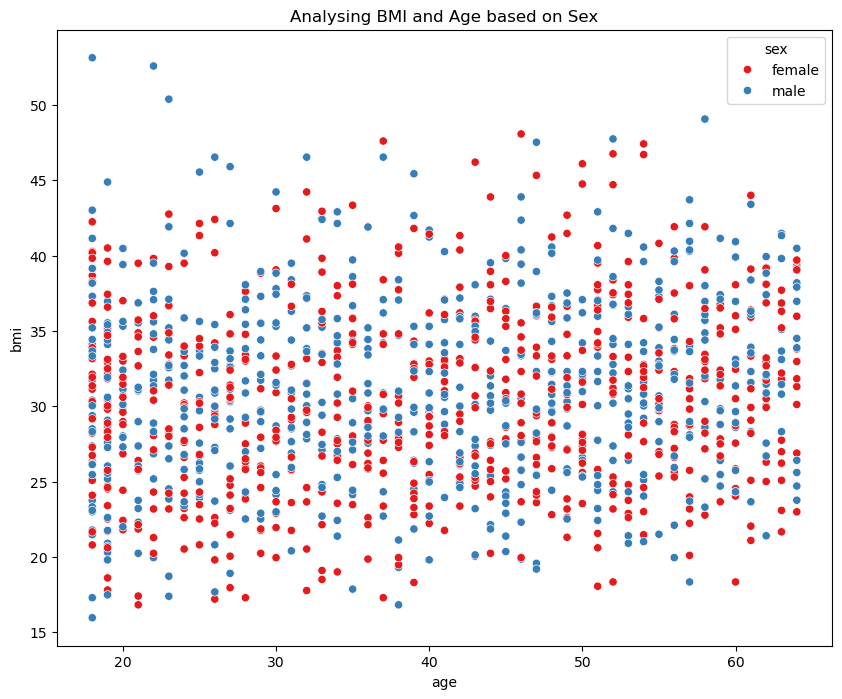

In [21]:
# what kind of age have how much bmi based on gender
plt.figure(figsize = (10, 8))
sns.scatterplot(x=data['age'],y=data['bmi'],hue = data['sex'], palette = 'Set1')
plt.title('Analysing BMI and Age based on Sex')
plt.show()

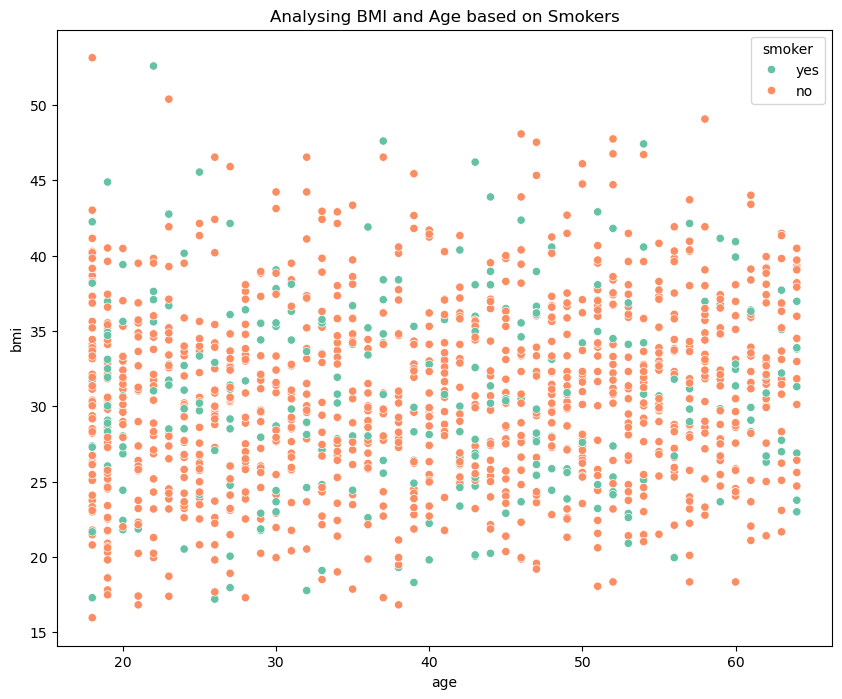

In [22]:
# what kind of age have how much bmi based on smokers
plt.figure(figsize = (10, 8))
sns.scatterplot(x=data['age'],y=data['bmi'],hue = data['smoker'], palette = 'Set2')
plt.title('Analysing BMI and Age based on Smokers')
plt.show()

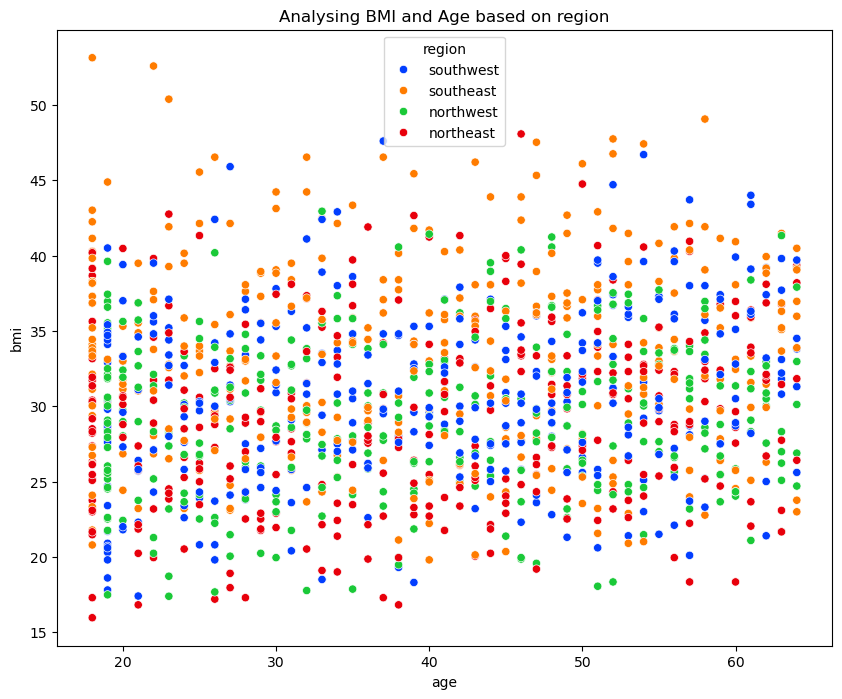

In [23]:
# what kind of age have how much bmi based on regions
plt.figure(figsize = (10, 8))
sns.scatterplot(x=data['age'],y=data['bmi'],hue = data['region'], palette = 'bright')
plt.title('Analysing BMI and Age based on region')
plt.show()

## **Analysis on Multiple Conditions**

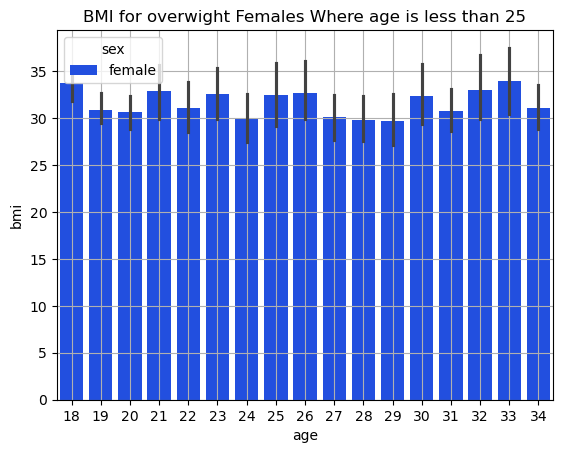

In [24]:
# analysing the female youth who who are overweight. 
bmi_female_youth = data[(data['bmi'] > 24) & (data['sex'] == 'female') & (data['age']<35)]
sns.barplot(x=bmi_female_youth['age'],y=bmi_female_youth['bmi'],hue = bmi_female_youth['sex'], palette = "bright")
plt.title("BMI for overwight Females Where age is less than 25")
plt.grid(True)
plt.show()

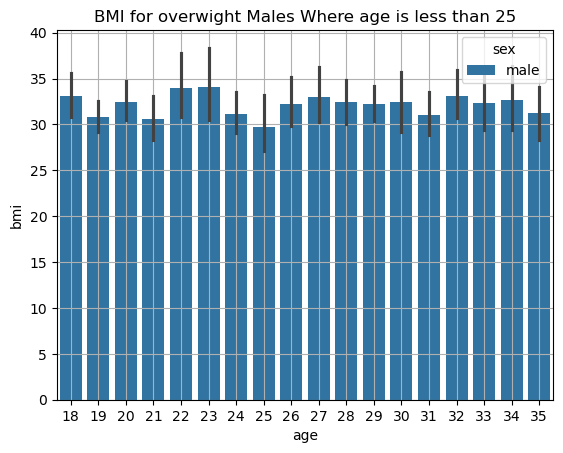

In [25]:
# analysing the male youth who who are overweight. 
bmi_male_youth = data[(data['bmi'] > 24) & (data['sex'] == 'male') & (data['age']<=35)]
sns.barplot(x=bmi_male_youth['age'],y=bmi_male_youth['bmi'],hue = bmi_male_youth['sex'])
plt.title("BMI for overwight Males Where age is less than 25")
plt.grid(True)
plt.show()

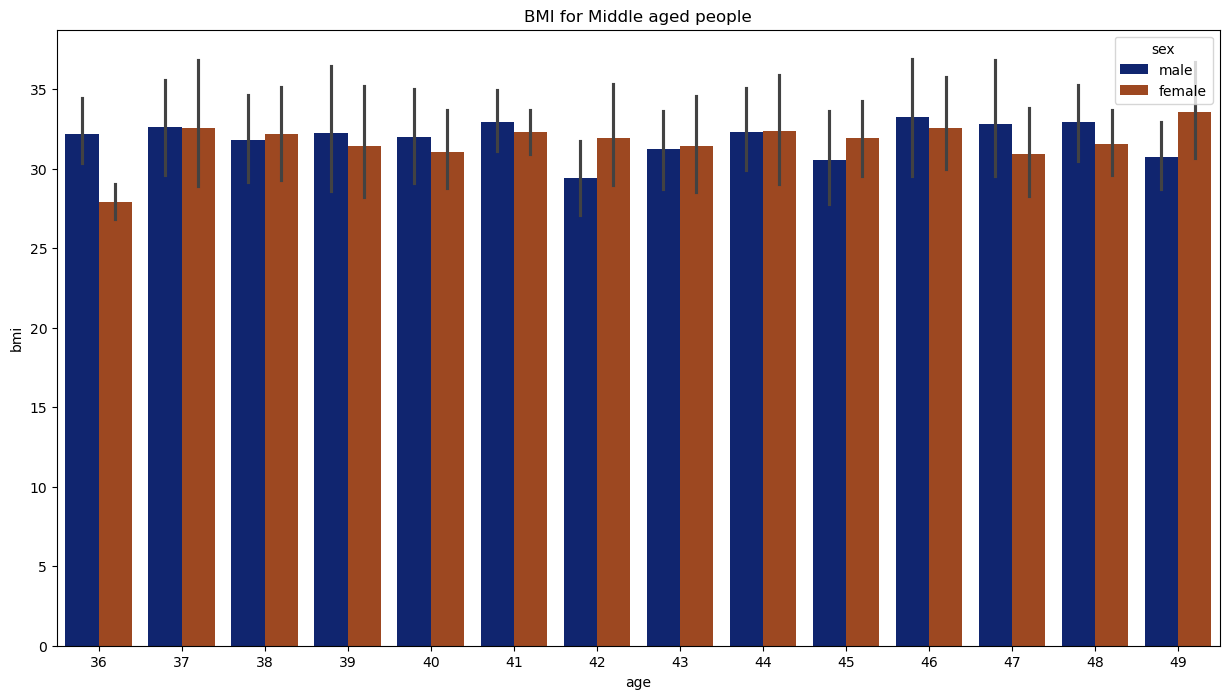

In [26]:
# analysing the middle aged persons who who are overweight. 
bmi_aged = data[(data['bmi'] > 24) & (data['age'] > 35) & (data['age']<50)]
plt.figure(figsize = (15,8))
sns.barplot(x=bmi_aged['age'],y=bmi_aged['bmi'],hue = bmi_aged['sex'], palette = "dark")
plt.title("BMI for Middle aged people")
plt.show()

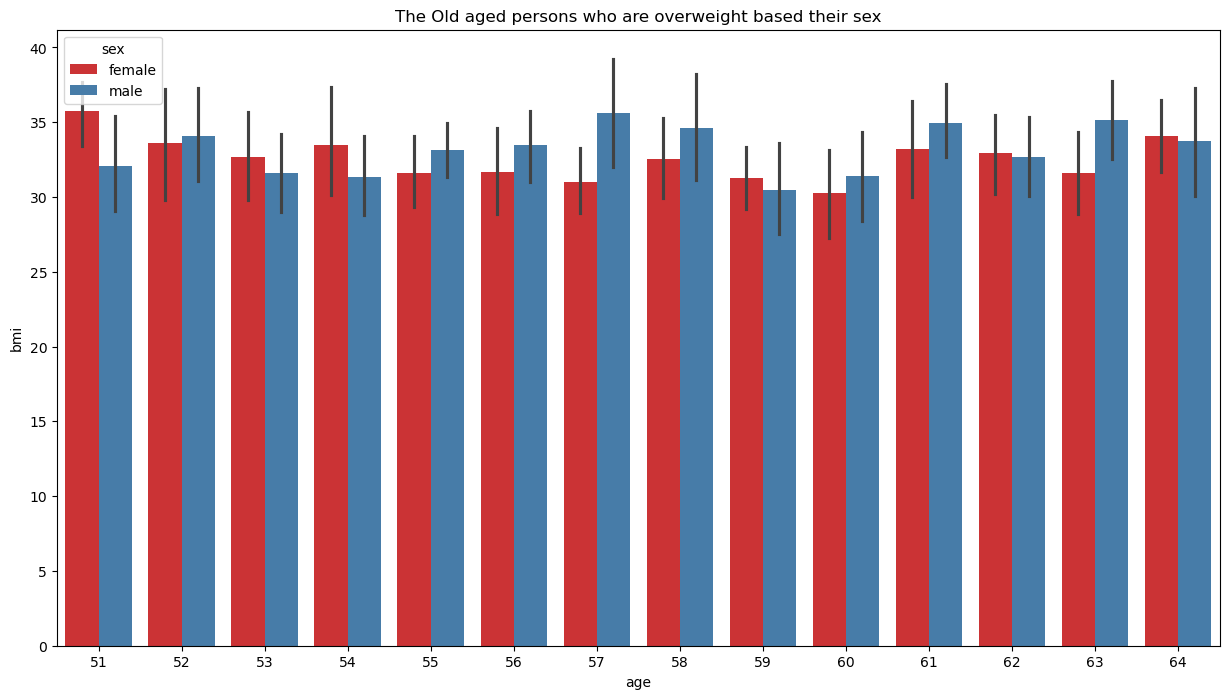

In [27]:
# analysing old age persons who are overwight
bmi_old = data[(data['bmi'] > 24) & (data['age'] > 50)]
plt.figure(figsize = (15,8))
sns.barplot(x=bmi_old['age'],y=bmi_old['bmi'],hue = bmi_old['sex'], palette = "Set1" )
plt.title("The Old aged persons who are overweight based their sex")
plt.show()

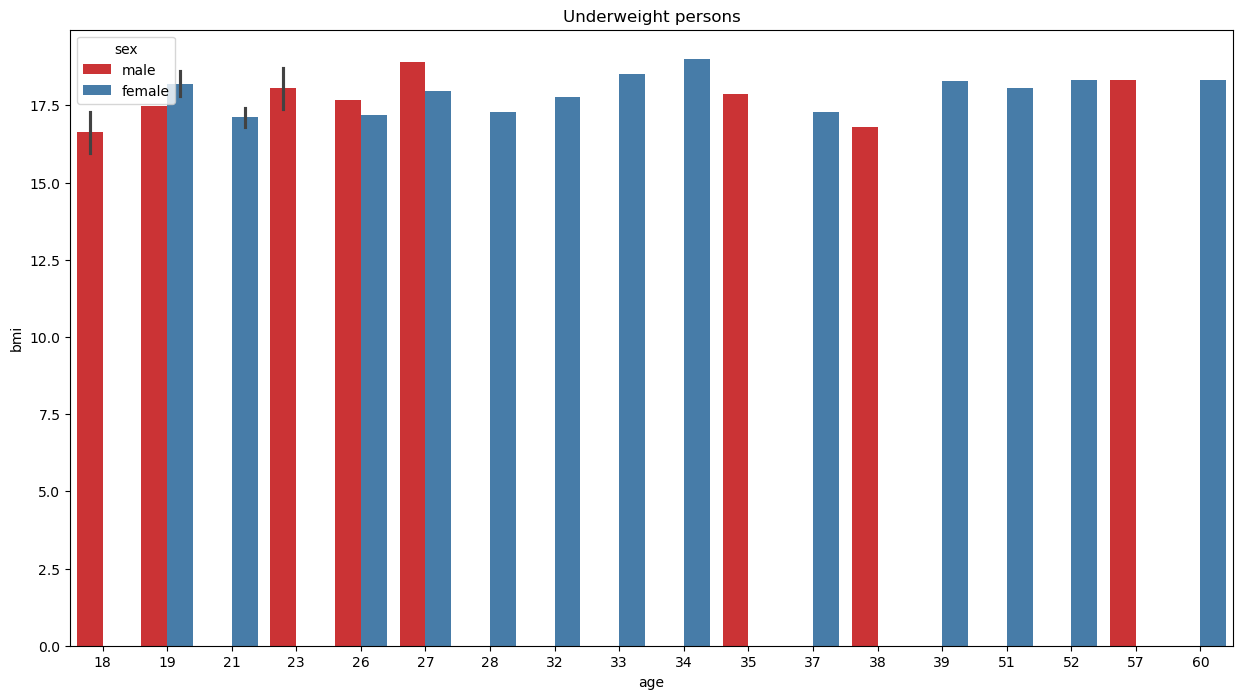

In [28]:
# analysis of persons with underweight
underweight = data[data['bmi'] <= 19]
plt.figure(figsize = (15,8))
sns.barplot(x=underweight['age'],y=underweight['bmi'],hue = underweight['sex'], palette = "Set1")
plt.title("Underweight persons")
plt.show()

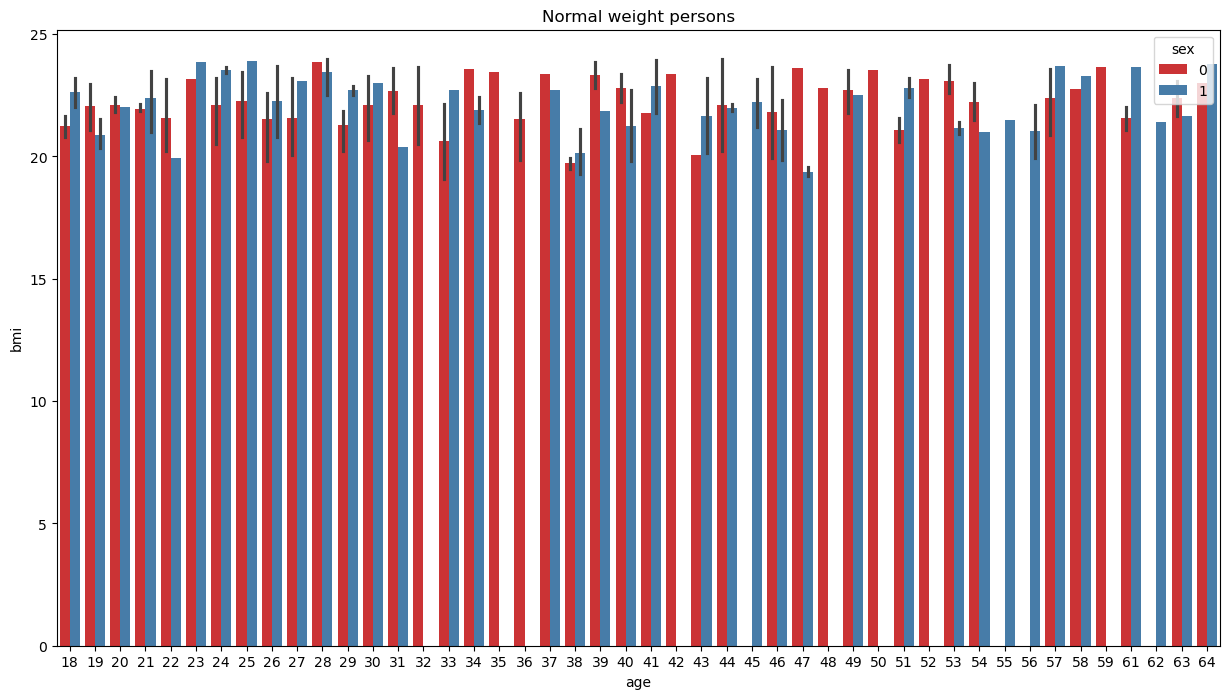

In [47]:
# analysis of persons with normal weight
Normal = data[(data['bmi'] > 19) & (data['bmi'] <=24)]
plt.figure(figsize = (15,8))
sns.barplot(x=Normal['age'],y=Normal['bmi'],hue = Normal['sex'], palette = "Set1")
plt.title("Normal weight persons")
plt.show()

In [30]:
print("\033[1m" + "bmi_male_youth: " + '\033[0m')
print(bmi_male_youth.shape[0])
print("\033[1m" + "bmi_female_youth: " + '\033[0m')
print(bmi_female_youth.shape[0])
print("\033[1m" + "bmi_aged: " + '\033[0m')
print(bmi_aged.shape[0])
print("\033[1m" + "bmi_old: " + '\033[0m')
print(bmi_old.shape[0])
print("\033[1m" + "underweight: " + '\033[0m')
print(underweight.shape[0])
print("\033[1m" + "Normal: " + '\033[0m')
print(Normal.shape[0])


bmi_male_youth: 
249
bmi_female_youth: 
214
bmi_aged: 
329
bmi_old: 
319
underweight: 
25
Normal: 
163


In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<p> There are no men having normal weight of age 32,35,36,42 and no female have normal weight of age 45,55,56,62. </p>

## **Turn dataset to Numeric** 

In [48]:
data['sex'] = data['sex'].map({'female':0,'male':1})
data['smoker'] = data['smoker'].map({'no':0,'yes':1})
data['region'] = data['region'].map({'northeast':1,'northwest':2,'southeast':3,'southwest':4})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,NaN,NaN,16884.92400
1,18,NaN,33.770,1,NaN,NaN,1725.55230
2,28,NaN,33.000,3,NaN,NaN,4449.46200
3,33,NaN,22.705,0,NaN,NaN,21984.47061
4,32,NaN,28.880,0,NaN,NaN,3866.85520


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       0 non-null      float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    0 non-null      float64
 5   region    0 non-null      float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [50]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,NaN,0.109272,0.042469,NaN,NaN,0.299008
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.109272,NaN,1.000000,0.012759,NaN,NaN,0.198341
children,0.042469,NaN,0.012759,1.000000,NaN,NaN,0.067998
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.299008,NaN,0.198341,0.067998,NaN,NaN,1.000000


## **Splitting into Target and Feature** 

In [51]:
feature = data.drop('charges',axis = 1)
target = data.charges

In [52]:
feature.head()

,age,sex,bmi,children,smoker,region
0,19,NaN,27.900,0,NaN,NaN
1,18,NaN,33.770,1,NaN,NaN
2,28,NaN,33.000,3,NaN,NaN
3,33,NaN,22.705,0,NaN,NaN
4,32,NaN,28.880,0,NaN,NaN


## **Splitting the data into training and testing** 

In [53]:
# splitting dataset into 75-25%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size = 0.25)

In [54]:
print(len(x_train),len(y_train),len(x_test),len(y_test))

1003 1003 335 335


## **Modelling** 

In [39]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
print (model)

LinearRegression()


In [40]:
# predicting test data
predictions = model.predict(x_test)

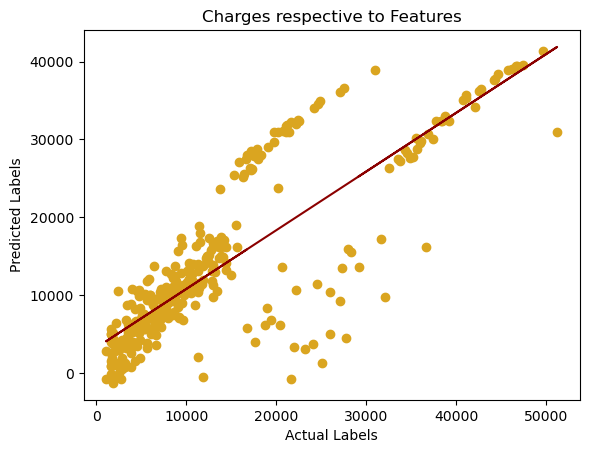

In [41]:
plt.scatter(y_test, predictions,color = 'goldenrod')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Charges respective to Features')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='darkred')
plt.show()

In [42]:
print(model.coef_)
print(model.intercept_)

[  262.26755434  -484.40667597   355.12758768   395.5490282
 24341.51776845  -327.84505215]
-12239.696374116069


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 42106821.03948263
RMSE: 6488.976886958578
R2: 0.6782712599582674


## **Conclusion** 

<ul><li>In conclusion we observe that there are no missing values in the data and the Insurance charges that should be payed annually 
have outliers but according to the features 
    that is fine so I didn't remove the outliers.</li>
    <li>
Both the genders are good customers in 
ACME Insurance company according to the data.<br>
We observe there are less smokers and many are 
from southeast region and company has good 
        customers from all the regions.</li>
    <li>Smokers have been paying above 20000 according 
to data. <br> Maximum of the smokers have NO 
children.<br> 43% of people in this dataset have
        no children.</li>
    <li>The Insurance charges were increased according to the increase in age.<br> The BMI for maximum people fall
between 28-33. <br>We observe many females in
        all the ages groups are underweight.</li>
    <li>The smoker feature has a 
great impact on the insurance charges. The correlation among them is 
        0.78</li>
    <li>For Modelling Linear regression is used to 
predict the Insurance charges based on the 
given features.<br>The model predicts the new 
data points certainly good and the R2_score
        for this is 0.75.</li><ul>

## **Prediction of Insurance charges for new customers** 

In [44]:
My_Family = {'age':[21,53,42],'sex':[0,1,0],'bmi':[23.20,25.10,23.00],'children':[0,2,2],'smoker':[0,0,0],'region':[3,3,3]}
My_Family=pd.DataFrame(My_Family)

In [45]:
My_Family.shape

(3, 6)

In [46]:
model.predict(My_Family)

array([ 523.34714496, 9897.34268101, 6751.03832506])

**If any suggestions or comments ready to accept.**